<a href="https://colab.research.google.com/github/DastanIqbal/LearnOpenCV/blob/main/src/OpenCV/dlap/week5/imageClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the previous chapter, we used a Multilayer Perceptron on the Fashion MNIST dataset. The performance was pretty good as we achieved 88% accuracy on test data. But there was a problem with that approach. In our training dataset, all images are centered. If the images in the test set are off-center, then the MLP approach fails miserably. We want the network to be Translation-Invariant.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
from tensorflow.keras.utils import to_categorical

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

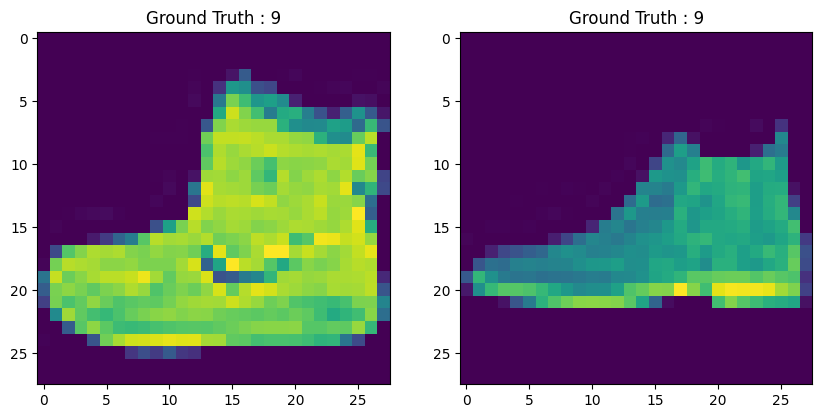

In [5]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:])
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:])
plt.title("Ground Truth : {}".format(test_labels[0]))


**Preprocess the Data**

In [6]:
# Find the shape of input images and create the variable input_shape
nDims = 1
nRows,nCols = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols,nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols,nDims)
input_shape = (nRows, nCols,nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [7]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**Define the Model**

In [8]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))

    return model

**Train the model**

In [9]:
model1 = createModel()
batch_size = 256
epochs = 20
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,258 (692.41 KB)

 Trainable params: 177,258 (692.41 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
test_loss,test_accuracy = model1.evaluate(test_data, test_labels_one_hot)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 222s 935ms/step - accuracy: 0.4720 - loss: 1.3868 - val_accuracy: 0.7760 - val_loss: 0.5729
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 204s 870ms/step - accuracy: 0.7764 - loss: 0.5925 - val_accuracy: 0.8340 - val_loss: 0.4533
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 264s 877ms/step - accuracy: 0.8284 - loss: 0.4602 - val_accuracy: 0.8515 - val_loss: 0.4027
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 256s 853ms/step - accuracy: 0.8602 - loss: 0.3837 - val_accuracy: 0.8786 - val_loss: 0.3317
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 205s 868ms/step - accuracy: 0.8769 - loss: 0.3397 - val_accuracy: 0.8878 - val_loss: 0.3073
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 264s 875ms/step - accuracy: 0.8872 - loss: 0.3125 - val_accuracy: 0.8952 - val_loss: 0.2896
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 852ms/step - accuracy: 0.8962 - loss: 0.2869 - val_accuracy: 0.8829 - val_loss: 0.3111
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 850ms/step - accuracy: 0.8992 -

**Check the loss and accuracy curves**

Text(0.5, 1.0, 'Loss Curves')

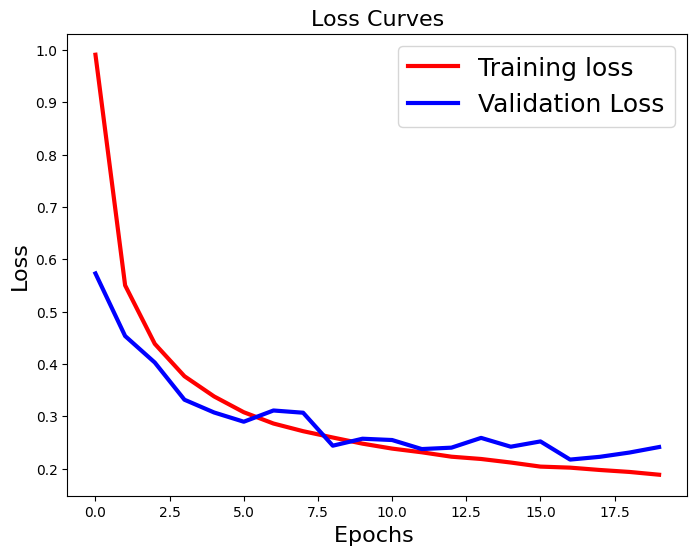

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

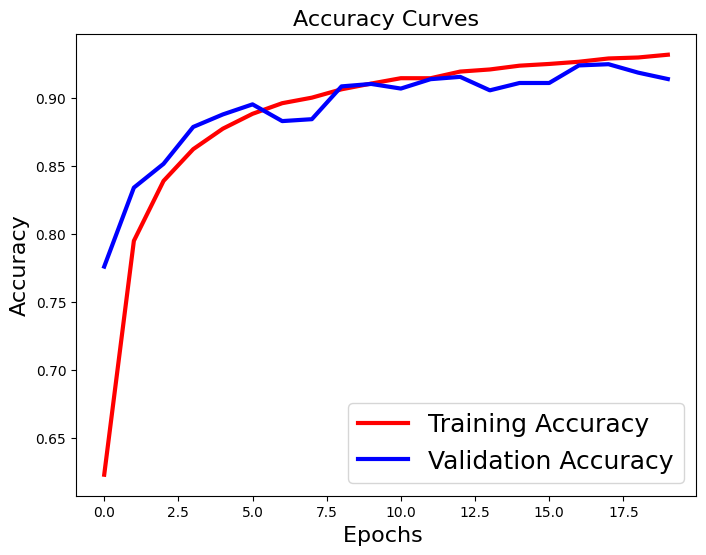

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

**Inference**

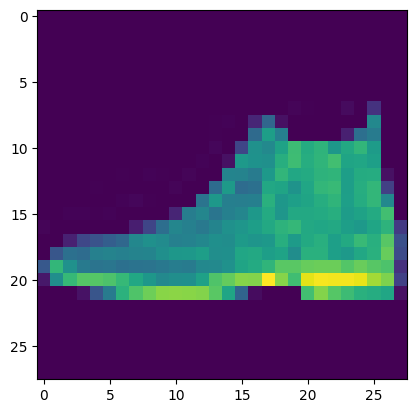

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Label = 9, Item = Ankle boot


In [29]:
testSample = test_data[0,:]
plt.imshow(testSample.reshape(28,28));plt.show()

predictions = model1.predict(testSample.reshape(1,28,28,nDims))
label = np.argmax(predictions,axis=-1)[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))


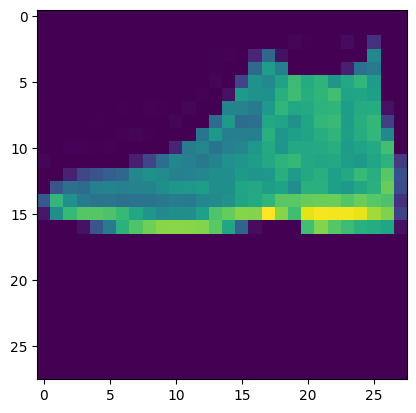

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Label = 9, Item = Ankle boot


In [18]:
# Now let us also check the output of the image that is shifted up¶

shiftUp = np.zeros(testSample.shape)
shiftUp[1:20,:] = testSample[6:25,:]
plt.imshow(shiftUp.reshape(28,28));plt.show()

predictions = model1.predict(test_data[[0],:])
label = np.argmax(predictions, axis=-1)[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))


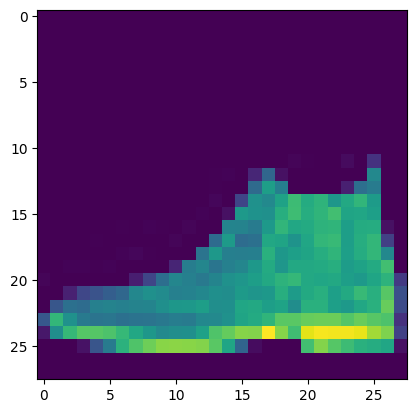

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Label = 9, Item = Ankle boot


In [26]:
# And for the image that is shifted Down?¶

shiftDown = np.zeros(testSample.shape)
shiftDown[10:27,:] = testSample[6:23,:]
plt.imshow(shiftDown.reshape(28,28));plt.show()

predictions = model1.predict(shiftDown.reshape(1,28,28,nDims))
label = np.argmax(predictions, axis=-1)[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))